In [1]:
from traj2sim import *
import math
from mpl_toolkits import mplot3d
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
        
def plot_alt_traj(list_traj):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for i in range(len(list_traj)):
        xdata = list_traj[i][:,1]
        ydata = list_traj[i][:,2]
        zdata = list_traj[i][:,3]
        if i%2 == 0:
            ax.scatter3D(xdata, ydata, zdata, c='g')
        else:
            ax.scatter3D(xdata, ydata, zdata, c='r')
    plt.show()
    
def plot_traj(list_traj):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for i in range(len(list_traj)):
        xdata = list_traj[i][:,0]
        ydata = list_traj[i][:,1]
        zdata = list_traj[i][:,2]
        if i%2 == 0:
            ax.scatter3D(xdata, ydata, zdata, c='g')
        else:
            ax.scatter3D(xdata, ydata, zdata, c='r')
    plt.show()
        
def sphere_point(theta, phi):
    return [math.sin(phi)*math.cos(theta), math.sin(phi)*math.sin(theta), -math.cos(phi)]

In [ ]:
def great_circle_with_time(theta, length=10, noise=False, sigma=0.05, time_i=0, time_f=10):
    traj = np.zeros((time_f-time_i,4))
    for i in range(0, time_f-time_i):
        traj[i][1:] = sphere_point(theta, (time_i+i)*math.pi/length)
        traj[i][0] = sphere_point(theta, (time_i+i)*math.pi/length)[2]
        if noise == True:
            traj[i][1:] = np.add(traj[i],sigma*np.random.randn(1,3))
    return traj

t2s = Traj2Sim()

traj1 = great_circle_with_time(2*math.pi*0.5, time_i=0, time_f=7)
traj2 = great_circle_with_time(2*math.pi*0.6, time_i=3, time_f=10)
print(traj1)
print(traj2)
print(t2s.custom_broken_dist(traj1, traj2))

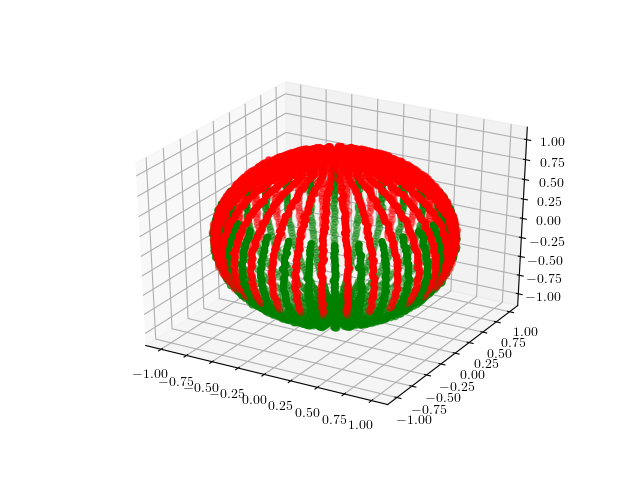

Persistence intervals:
[(0, (0.0, inf)), (1, (0.10766726893221816, 0.8439304477838573)), (2, (0.8740834569796605, 1.5514209763480578)), (0, (0.0, 0.11159056510351738)), (0, (0.0, 0.10805928052743724)), (0, (0.0, 0.10744498825127322)), (0, (0.0, 0.10721773056505944)), (0, (0.0, 0.10708576816923501)), (0, (0.0, 0.10707509494137508)), (0, (0.0, 0.10703183620835498))]


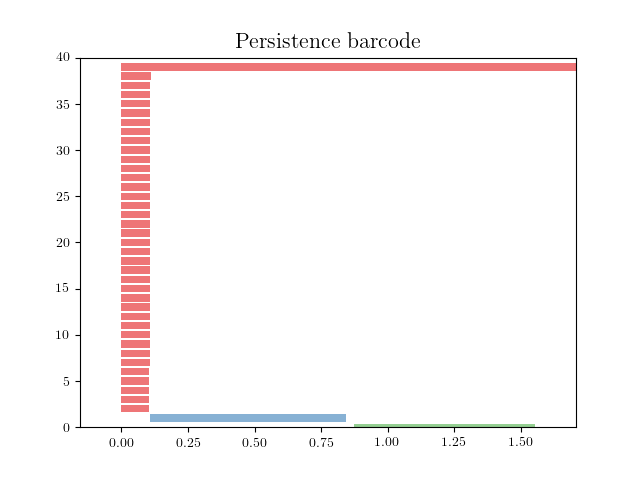

In [11]:
def great_circle_with_time(theta, length=10, noise=False, sigma=0.005, time_i=0, time_f=10):
    traj = np.zeros((time_f-time_i,4))
    for i in range(0, time_f-time_i):
        traj[i][1:] = sphere_point(theta, (time_i+i)*math.pi/length)
        #traj[i][0] = -np.arccos(sphere_point(theta, (time_i+i)*math.pi/length)[2])
        traj[i][0] = sphere_point(theta, (time_i+i)*math.pi/length)[2]
        if noise == True:
            traj[i][1:] = np.add(traj[i][1:],sigma*np.random.randn(1,3))
    return traj

def great_circle(theta, length=10, noise=False, sigma=0.005, time_i=0, time_f=10):
    traj = np.zeros((time_f-time_i,3))
    for i in range(0, time_f-time_i):
        traj[i] = sphere_point(theta, (time_i+i)*math.pi/length)
        #traj[i][0] = -np.arccos(sphere_point(theta, (time_i+i)*math.pi/length)[2])
        #traj[i][0] = sphere_point(theta, (time_i+i)*math.pi/length)[2]
        if noise == True:
            traj[i] = np.add(traj[i][1:],sigma*np.random.randn(1,3))
    return traj

t2s = Traj2Sim()

list_traj = []
'''
N=30
length=100
for i in range(N):
    if i%2 == 0:
        list_traj.append(great_circle_with_time(2*i*math.pi/N, length, noise=True,time_i=int(0.2*length), time_f=int(0.7*length)))
    else:
        list_traj.append(great_circle_with_time(2*i*math.pi/N, length, noise=True,time_i=int(0.3*length), time_f=int(0.8*length)))

for i in range(N):
    if i%2 == 0:
        list_traj.append(great_circle_with_time(2*i*math.pi/N, length, noise=True,time_i=0, time_f=int(0.3*length)))
    else:
        list_traj.append(great_circle_with_time(2*i*math.pi/N, length, noise=True,time_i=int(0.7*length), time_f=length-1))

'''
list_traj = []
N=60
length=100
for i in range(N):
    if i%2 == 0:
        list_traj.append(great_circle_with_time(2*i*math.pi/N, length, noise=1,time_i=int(0*length), time_f=int(0.65*length)))
    else:
        list_traj.append(great_circle_with_time(2*i*math.pi/N, length, noise=1,time_i=int(0.35*length), time_f=int(1*length)-1))        

plot_alt_traj(list_traj)

t2s.set_trajectories(list_traj)
t2s.dist = 'custom'
t2s.compute_dist(verbose=False)
t2s.compute_sim(verbose=False)

print('Persistence intervals:')
pers = t2s.simplex_tree.persistence(homology_coeff_field=2, min_persistence=0.1)
pers.sort(key=lambda x: x[1][0]-x[1][1])
print(pers[:10])

gudhi.plot_persistence_barcode(pers[:40])

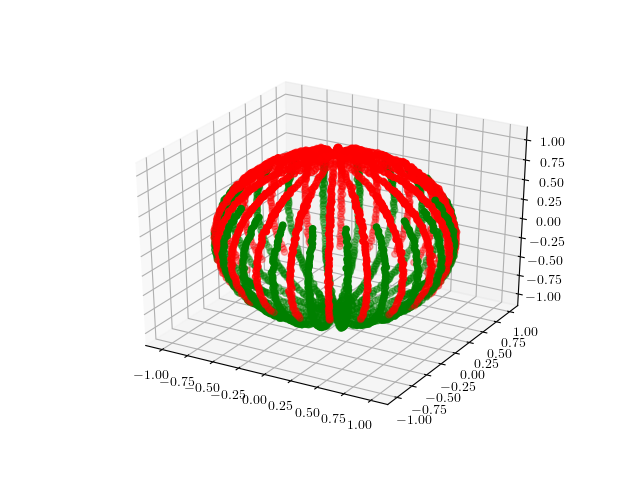

Persistence intervals:
[(0, (0.0, inf)), (2, (0.9364792321467209, 1.6740284743905787)), (1, (0.25819206596628813, 0.8697769300807575)), (0, (0.0, 0.602470323933736)), (0, (0.0, 0.5732780033499356)), (1, (0.2610253294803317, 0.6212684956908443)), (0, (0.0, 0.32256026584507635)), (0, (0.0, 0.32133947698175)), (0, (0.0, 0.32106568202700836)), (0, (0.0, 0.3210555932206085))]


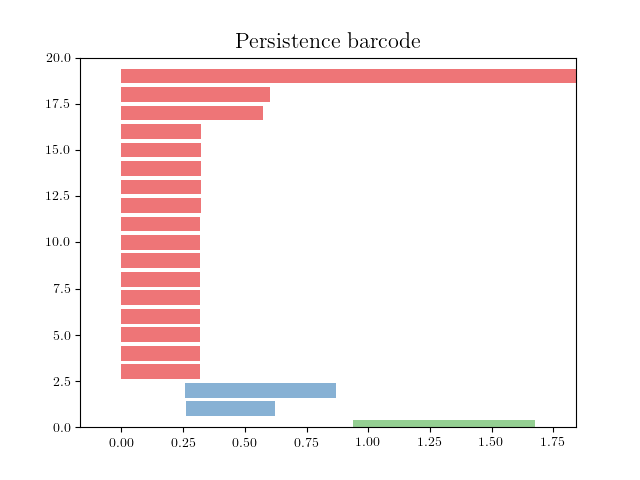

In [5]:
def great_circle_with_time(theta, length=10, noise=False, sigma=0.005, time_i=0, time_f=10):
    traj = np.zeros((time_f-time_i,4))
    for i in range(0, time_f-time_i):
        traj[i][1:] = sphere_point(theta, (time_i+i)*math.pi/length)
        #traj[i][0] = -np.arccos(sphere_point(theta, (time_i+i)*math.pi/length)[2])
        traj[i][0] = sphere_point(theta, (time_i+i)*math.pi/length)[2]
        if noise == True:
            traj[i][1:] = np.add(traj[i][1:],sigma*np.random.randn(1,3))
    return traj

def great_circle(theta, length=10, noise=False, sigma=0.005, time_i=0, time_f=10):
    traj = np.zeros((time_f-time_i,3))
    for i in range(0, time_f-time_i):
        traj[i] = sphere_point(theta, (time_i+i)*math.pi/length)
        #traj[i][0] = -np.arccos(sphere_point(theta, (time_i+i)*math.pi/length)[2])
        #traj[i][0] = sphere_point(theta, (time_i+i)*math.pi/length)[2]
        if noise == True:
            traj[i] = np.add(traj[i],sigma*np.random.randn(1,3))
    return traj

t2s = Traj2Sim()

list_traj = []

N=40
length=100
for i in range(N):
    if i%2 == 0:
        list_traj.append(great_circle(2*i*math.pi/N, length, noise=True,time_i=int(0.2*length), time_f=int(0.7*length)))
    else:
        list_traj.append(great_circle(2*i*math.pi/N, length, noise=True,time_i=int(0.3*length), time_f=int(0.8*length)))

for i in range(N):
    if i%2 == 0:
        list_traj.append(great_circle(2*i*math.pi/N, length, noise=True,time_i=0, time_f=int(0.3*length)))
    else:
        list_traj.append(great_circle(2*i*math.pi/N, length, noise=True,time_i=int(0.7*length), time_f=length-1))

'''
list_traj = []
N=40
length=100
for i in range(N):
    if i%2 == 0:
        list_traj.append(great_circle_with_time(2*i*math.pi/N, length, noise=1,time_i=int(0*length), time_f=int(0.75*length)))
    else:
        list_traj.append(great_circle_with_time(2*i*math.pi/N, length, noise=1,time_i=int(0.25*length), time_f=int(1*length)-1))        
'''
plot_traj(list_traj)

t2s.set_trajectories(list_traj)
t2s.dist = 'hausdorff'
t2s.compute_dist(verbose=False)
t2s.compute_sim(verbose=False)

print('Persistence intervals:')
pers = t2s.simplex_tree.persistence(homology_coeff_field=2, min_persistence=0.1)
pers.sort(key=lambda x: x[1][0]-x[1][1])
print(pers[:10])

gudhi.plot_persistence_barcode(pers[:20])

#t2s.display_persistence()

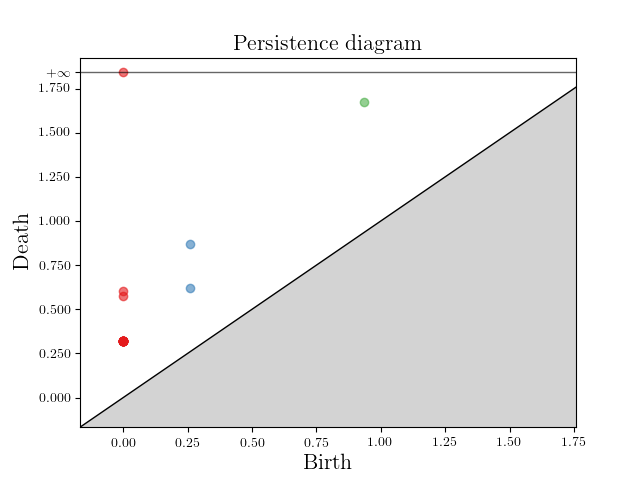

In [6]:
gudhi.plot_persistence_diagram(pers[:20])
